In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("bee_data.csv")
df.head(5)

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [12]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

# Extract year and state information
df['year'] = df['date'].dt.year
df['state'] = df['location'].apply(lambda x: x.split(', ')[-1])

<Figure size 1200x600 with 0 Axes>

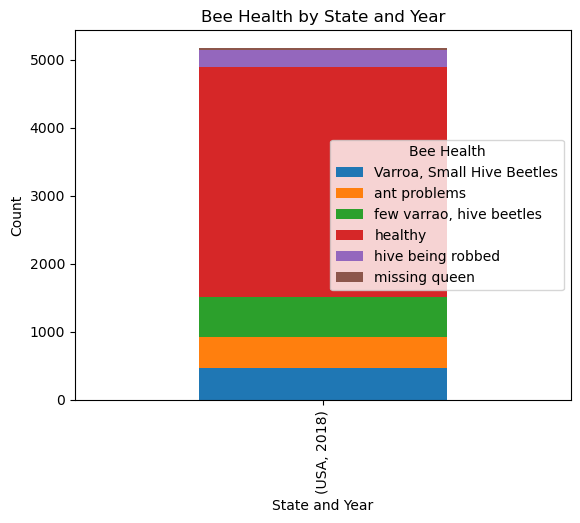

In [13]:
# Chart 1: Bee Health by State and Year
plt.figure(figsize=(12, 6))
df_health = df.groupby(['state', 'year', 'health']).size().unstack()
df_health.plot(kind='bar', stacked=True)
plt.title('Bee Health by State and Year')
plt.xlabel('State and Year')
plt.ylabel('Count')
plt.legend(title='Bee Health')
plt.show()

<Figure size 1200x600 with 0 Axes>

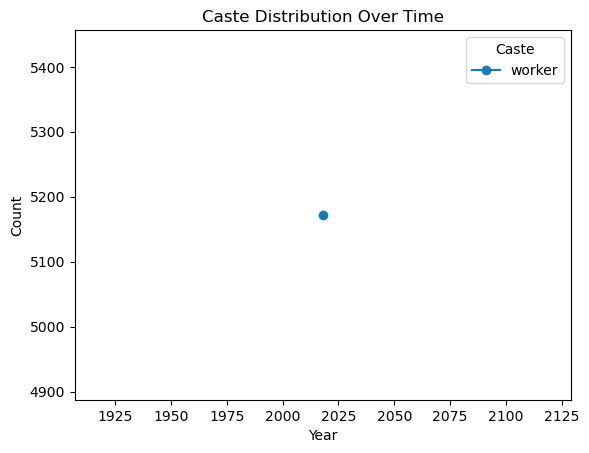

In [14]:
# Chart 2: Caste Distribution Over Time
plt.figure(figsize=(12, 6))
df_caste = df.groupby(['year', 'caste']).size().unstack()
df_caste.plot(kind='line', marker='o')
plt.title('Caste Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Caste')
plt.show()

<Figure size 1200x600 with 0 Axes>

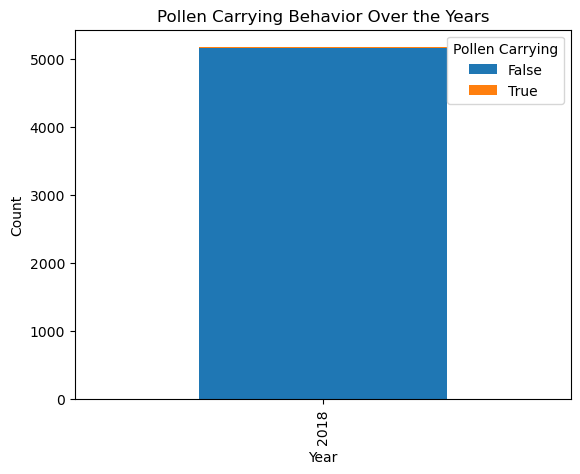

In [15]:
# Chart 3: Pollen Carrying Behavior Over the Years
plt.figure(figsize=(12, 6))
df_pollen = df.groupby(['year', 'pollen_carrying']).size().unstack()
df_pollen.plot(kind='bar', stacked=True)
plt.title('Pollen Carrying Behavior Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Pollen Carrying')
plt.show()